What is Facebook Prophet Model?

Facebook Prophet is an algorithm developed by Facebook’s Core Data Science team. 

It is used in the applications of time series forecasting. 

It is very much used when there is a possibility of seasonal effects.

In [1]:
import pandas as pd
import numpy as np
import fbprophet
from fbprophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

Now, as I have imported all the necessary packages, I will move forward by reading dataset that we need for Daily Births Forecasting:

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url, parse_dates=['Date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


I have used “ds” and “y” as the names of the columns as it is the preformatted way that we are required to fit our data in the Facebook Prophet Model.

let’s visualize the data to have a quick look at what we are working with:

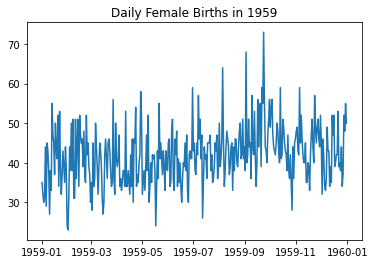

In [3]:
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959');

Now, I will create a Prophet instance to apply the seasonality effects for the task of daily births forecast with Machine Learning:

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=False, 
                          changepoint_range=0.9, 
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [5]:
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

Now, let’s visualize the seasonality effects we got after applying the model:

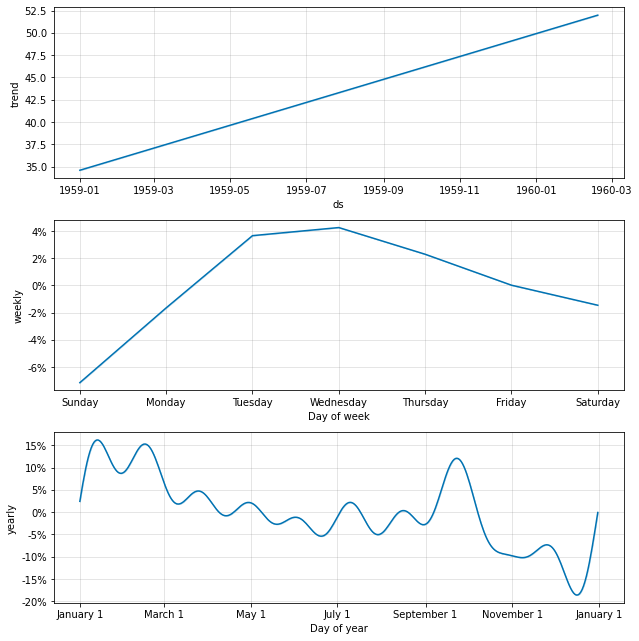

In [7]:
m.plot_components(forecast);

Now, let’s visualize the predictions made by the Facebook prophet model for daily births prediction:

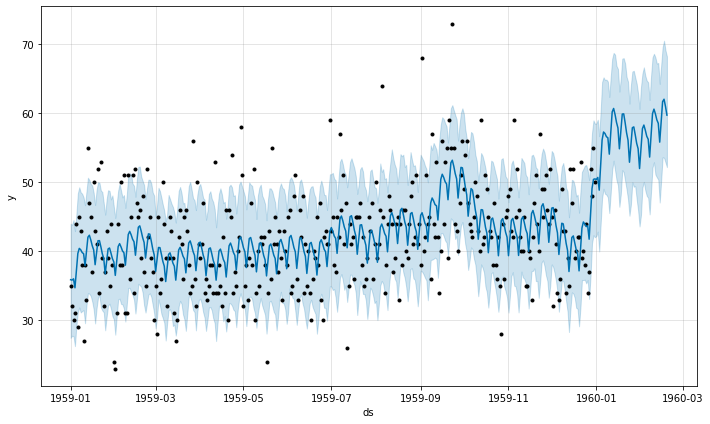

In [8]:
m.plot(forecast);

Change point detection


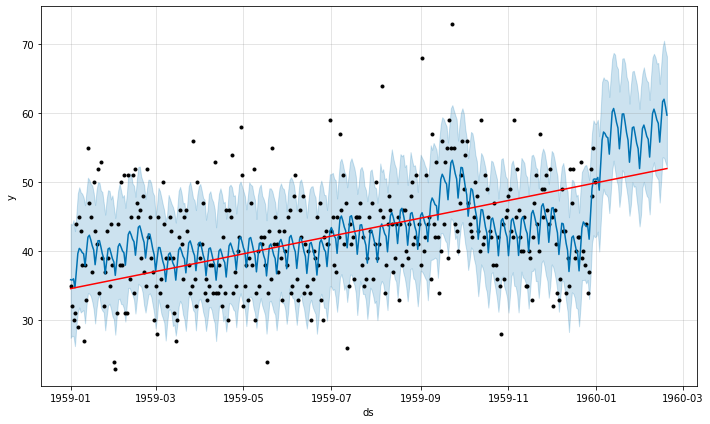

In [9]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast);


No change is detected.